# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}3&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | douglas
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | la gi
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | udachny
Processing Record 16 of Set 1 | holualoa
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | ballina
Processing Record 20 of Set 1 | ciudad guadalupe victoria
Processing Record 21 of Set 1 | alotau
Processing Record 22 of Set 1 | tiksi
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,9.25,76,75,7.20,CL,1738844080
1,papatowai,-46.5619,169.4708,9.14,89,17,2.90,NZ,1738844081
2,hasaki,35.7333,140.8333,6.56,31,21,3.92,JP,1738844082
3,san patricio,28.0170,-97.5169,20.97,94,31,4.99,US,1738844083
4,albany,42.6001,-73.9662,-6.88,80,100,4.44,US,1738844084


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.25,76,75,7.20,CL,1738844080
1,papatowai,-46.5619,169.4708,9.14,89,17,2.90,NZ,1738844081
2,hasaki,35.7333,140.8333,6.56,31,21,3.92,JP,1738844082
3,san patricio,28.0170,-97.5169,20.97,94,31,4.99,US,1738844083
4,albany,42.6001,-73.9662,-6.88,80,100,4.44,US,1738844084


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

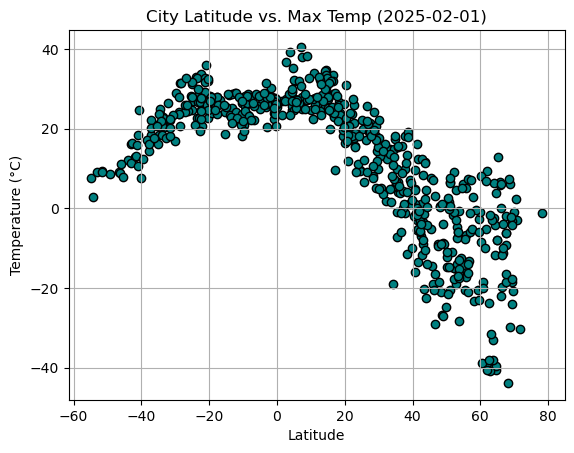

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

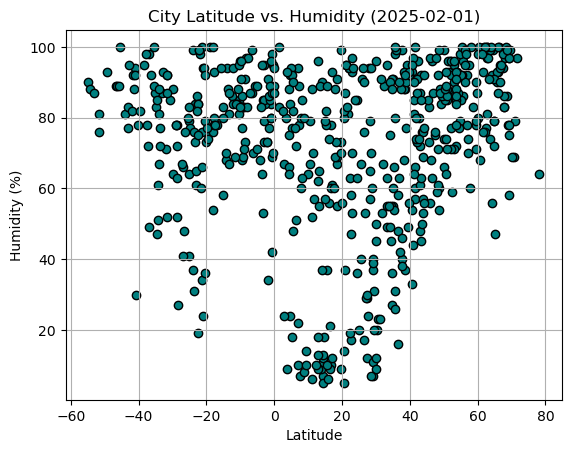

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

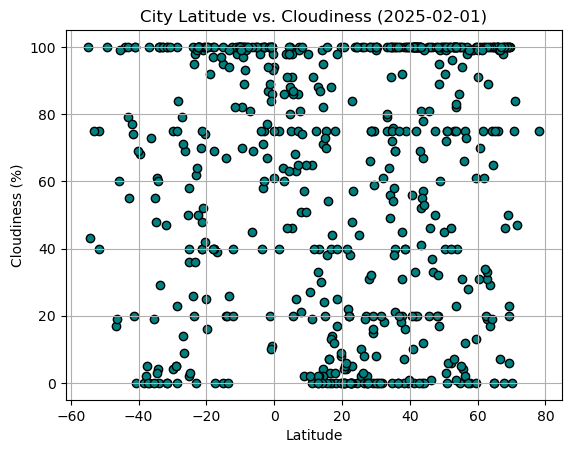

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

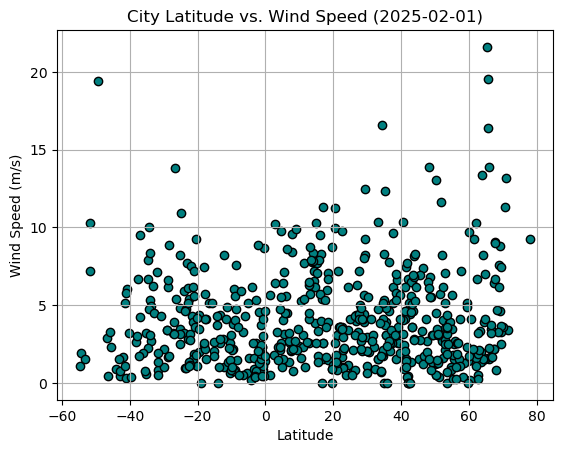

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# def create_linear_regression_plot(x, y, x_label='X-axis', y_label='Y-axis', title='Linear Regression Plot'):
#     """
#     Create a Linear Regression plot for the given x and y data.
    
#     Parameters:
#     x (array-like): The independent variable data.
#     y (array-like): The dependent variable data.
#     x_label (str): Label for the x-axis.
#     y_label (str): Label for the y-axis.
#     title (str): Title of the plot.
#     """
#     # Perform linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
#     # Calculate regression line values
#     regression_line = slope * x + intercept

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hasaki,35.7333,140.8333,6.56,31,21,3.92,JP,1738844082
3,san patricio,28.0170,-97.5169,20.97,94,31,4.99,US,1738844083
4,albany,42.6001,-73.9662,-6.88,80,100,4.44,US,1738844084
5,stanley,54.8680,-1.6985,6.01,79,0,1.03,GB,1738843994
8,douglas,41.3000,-96.1670,-5.38,81,0,4.12,US,1738843871


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.25,76,75,7.20,CL,1738844080
1,papatowai,-46.5619,169.4708,9.14,89,17,2.90,NZ,1738844081
6,adamstown,-25.0660,-130.1015,24.62,79,2,4.85,PN,1738844086
7,puerto ayora,-0.7393,-90.3518,22.53,98,11,0.80,EC,1738844088
9,port-aux-francais,-49.3500,70.2167,8.63,93,100,19.43,TF,1738844091


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.8331275596851736


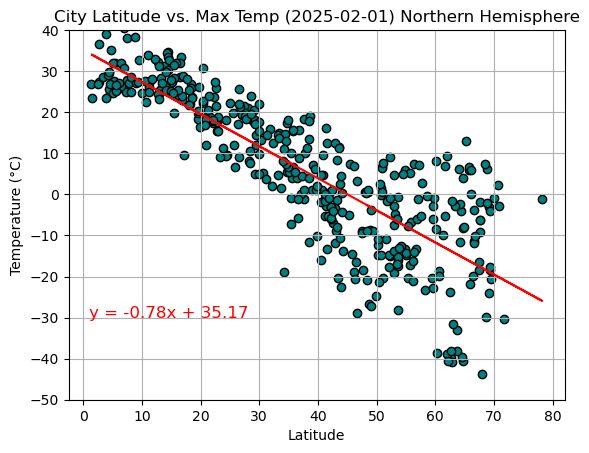

In [16]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp (2025-02-01) Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.ylim(-50,40)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Calculate regression line values
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (1, -30), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

The r^2 value is: 0.6455614499080371


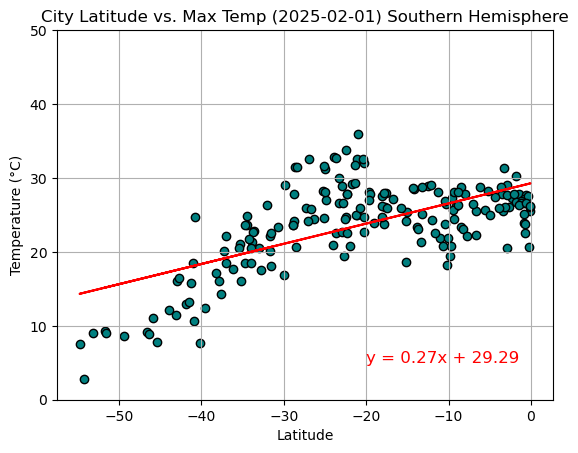

In [17]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp (2025-02-01) Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.ylim(0,50)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate regression line values
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (-20, 5), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

**Discussion about the linear relationship:** There is a strong relationship between temperature and latitude in the northern hemisphere, but the relationship is weaker in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.44567509135654443


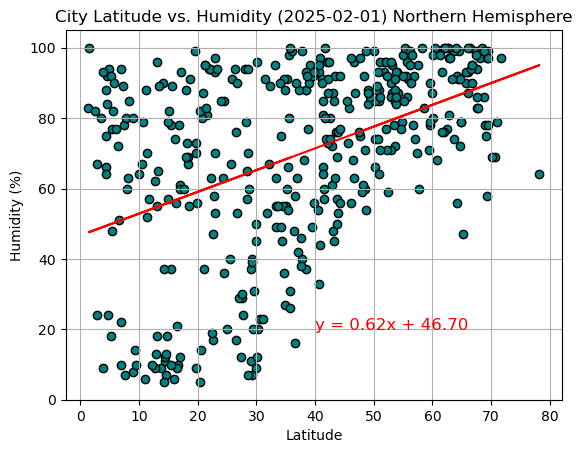

In [18]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-02-01) Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate regression line values
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (40, 20), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

The r^2 value is: 0.022974920348011428


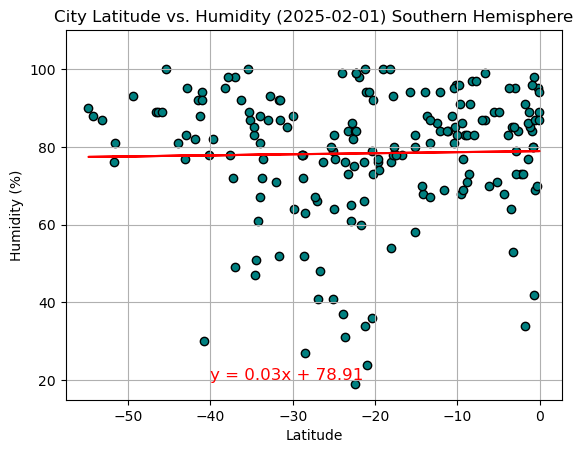

In [27]:
# Southern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-02-01) Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,110)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate regression line values
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (-40, 20), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

**Discussion about the linear relationship:** There is a moderate relationship between humidity and latitude in the northern hemisphere, but the relationship is weaker in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.19339845445543874


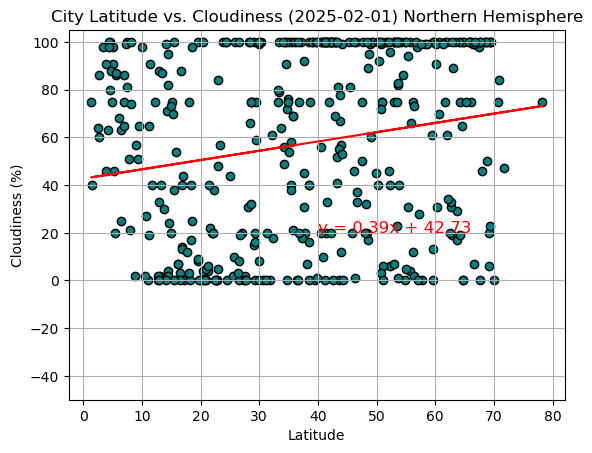

In [28]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-02-01) Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-50,105)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate regression line values
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (40, 20), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

The r^2 value is: 0.29013310305896484


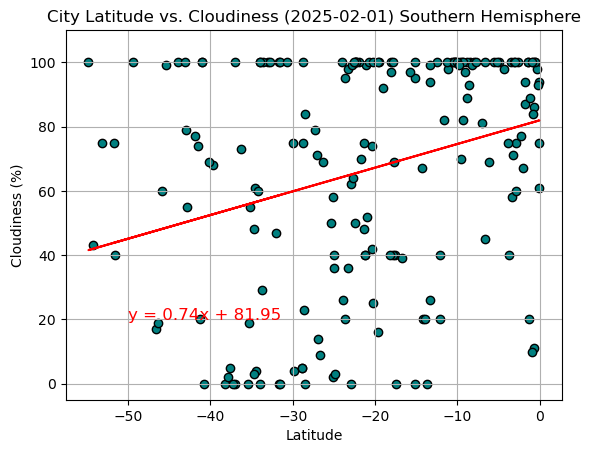

In [32]:
# Southern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-02-01) Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,110)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate regression line values
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (-50, 20), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

**Discussion about the linear relationship:** There is a moderate relationship between humidity and latitude in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.0046224497630268455


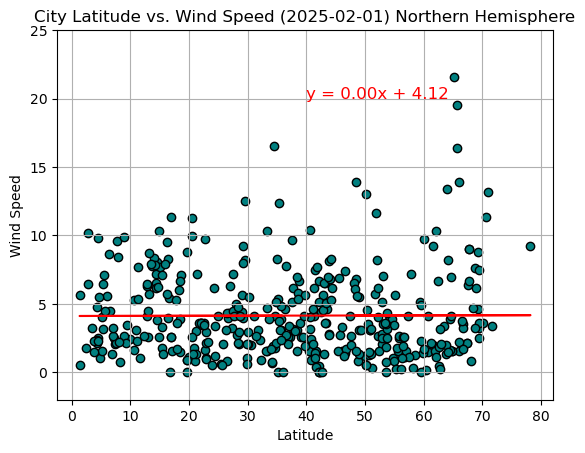

In [37]:
# Northern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-02-01) Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-2,25)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate regression line values
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(northern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (40, 20), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

The r^2 value is: -0.19085302225451833


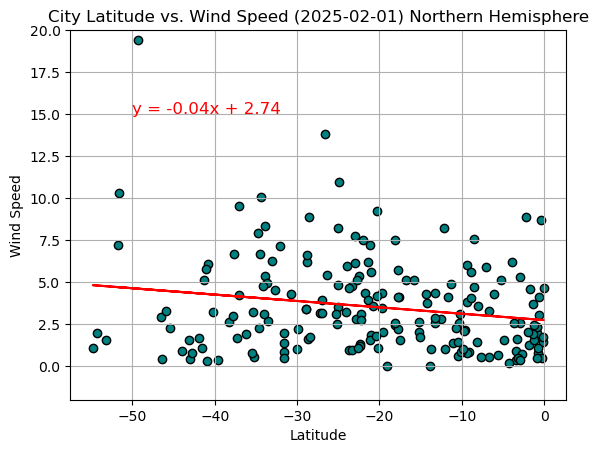

In [41]:
# Southern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color = "teal", marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-02-01) Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-2,20)
plt.grid(True)

# Define function to create Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate regression line values
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Plot regression line
plt.plot(southern_hemi_df["Lat"],regression_line, color='red', label='Regression Line')

# Plot regression line formula on graph
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, (-50, 15), fontsize=12, color='red')

# Print the r^2 value
print(f'The r^2 value is: {r_value}')

**Discussion about the linear relationship:** There is almost no relationship between latitude and wind speed in the northern hempisphere and there is a moderate relationship in the southern hemisphere.